## <p align="center">🌸 Iris Flower Classification</p>


## 🔧 Import Libraries

In [24]:
# For data manipulation and analysis
import pandas as pd        

# For creating visualizations
import matplotlib.pyplot as plt 

# For statistical data visualization with enhanced style
import seaborn as sns         

# For creating vvisualization to null values
import missingno as missno       

# Import LabelEncoder to convert categorical target ('Species') into numerical labels
from sklearn.preprocessing import LabelEncoder

# train_test_split: to split data into training and testing sets
from sklearn.model_selection import train_test_split

# StandardScaler: to scale numerical features for SVM
from sklearn.preprocessing import StandardScaler

# SVC: Support Vector Machine classifier
from sklearn.svm import SVC

# accuracy_score, confusion_matrix, classification_report: evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## 🔍 Data Loading & Initial Exploration

In [2]:
data = pd.read_csv("Iris.csv")  # Load the Iris dataset from CSV file
data.sample(5)                  # Display 5 random samples to get a quick look at the data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
84,85,5.4,3.0,4.5,1.5,Iris-versicolor
89,90,5.5,2.5,4.0,1.3,Iris-versicolor
128,129,6.4,2.8,5.6,2.1,Iris-virginica
91,92,6.1,3.0,4.6,1.4,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica


In [3]:
data.shape # Display size of data

(150, 6)

In [4]:
# Display a concise summary of the dataset: 
# column names, data types, and non-null counts
data.info()  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Show nulls in each column
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

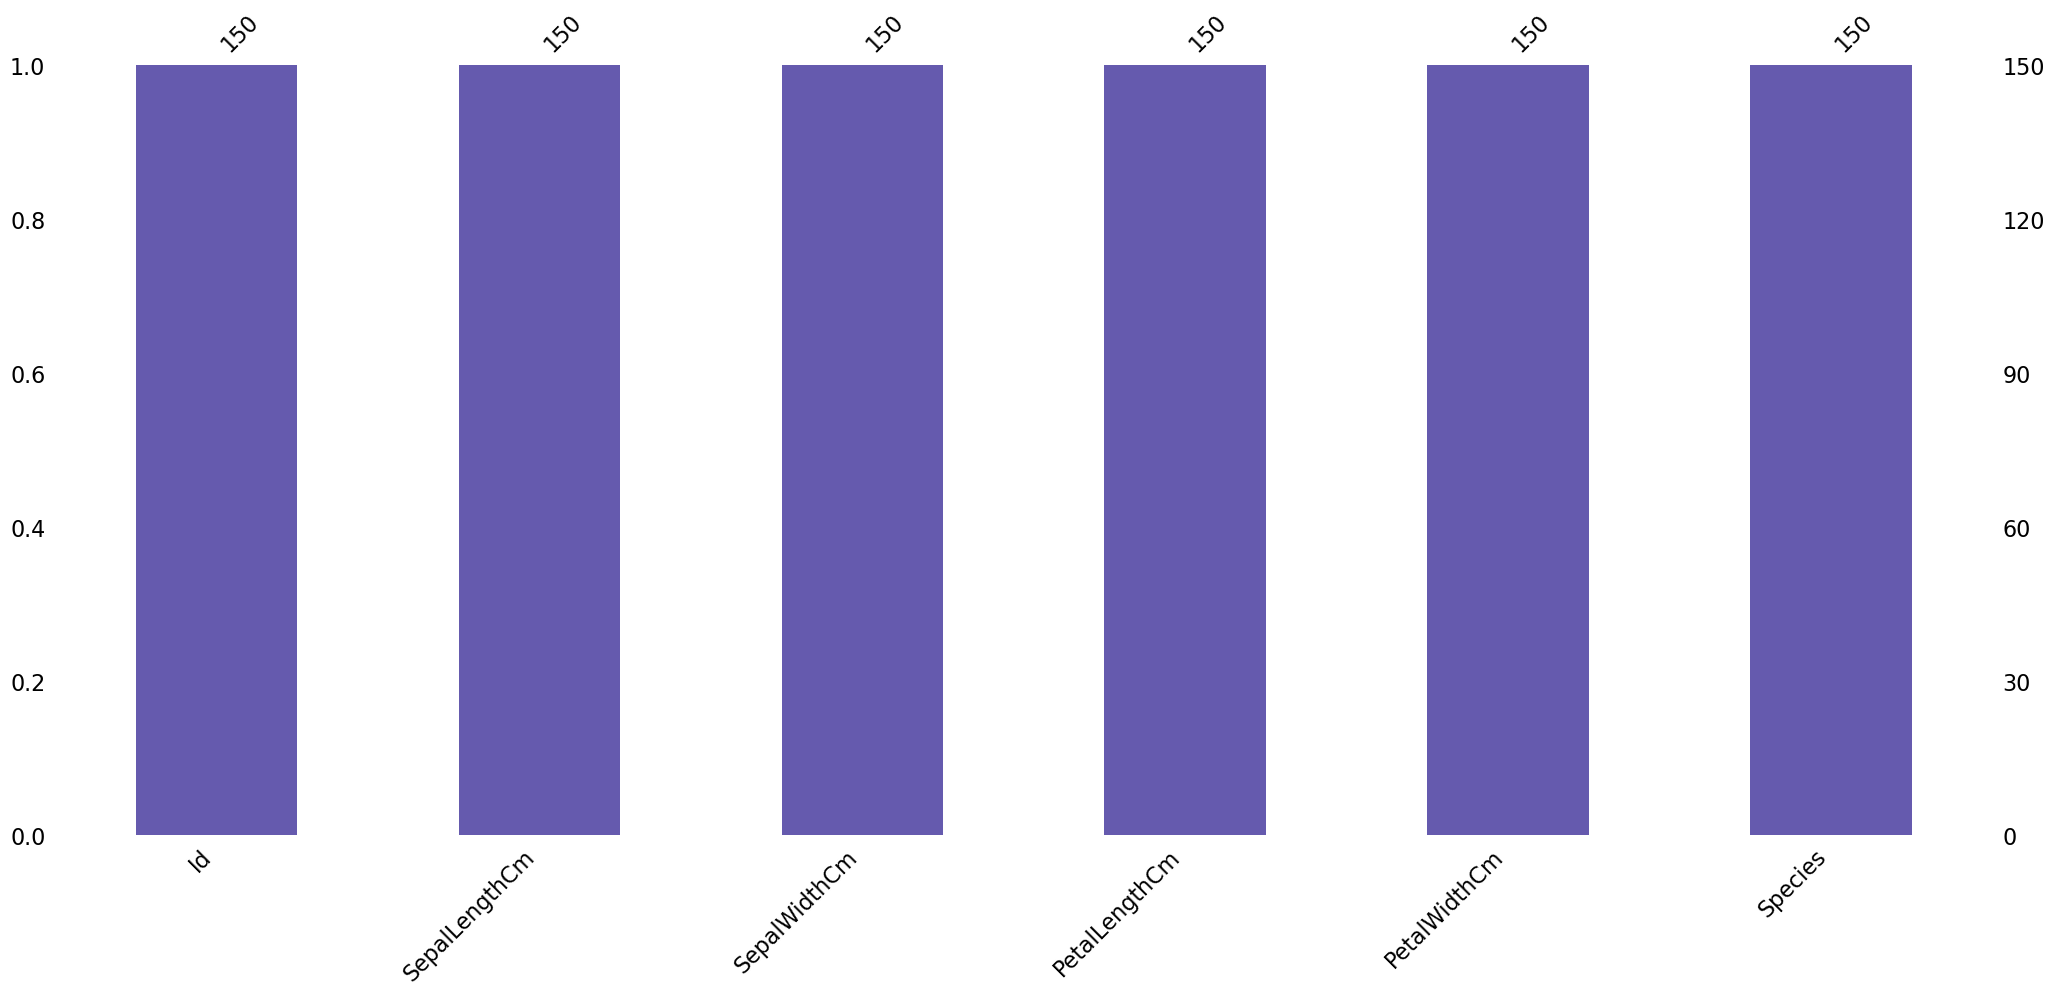

In [6]:
# Visualize missing values
missno.bar(data, 
           color="#655AAE")

In [7]:
# Number of duplicated data
data.duplicated().sum()

0

In [8]:
# Generate summary statistics for numerical columns
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


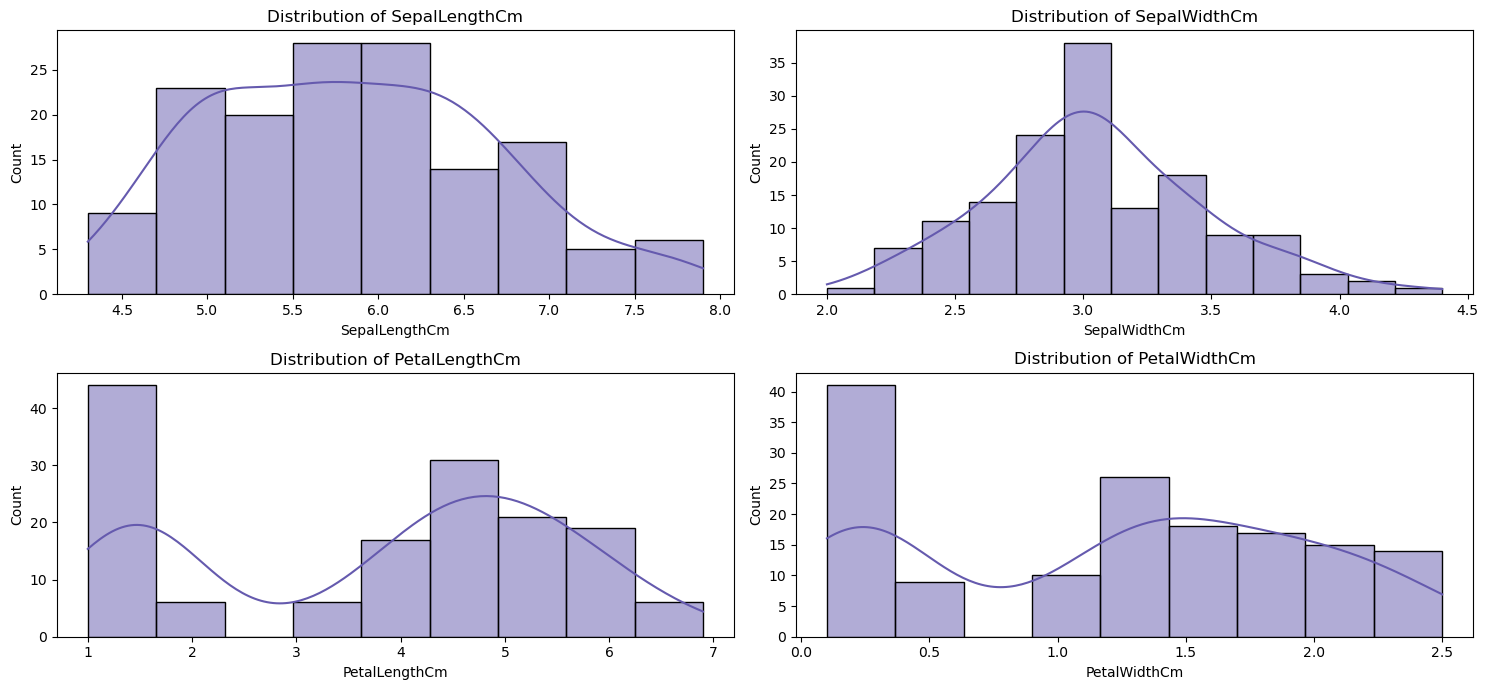

In [9]:
# Select numerical columns
numerical_columns = ['SepalLengthCm', 'SepalWidthCm',
                    'PetalLengthCm' , 'PetalWidthCm']

# Set the figure size for all subplots
plt.figure(figsize = (15 , 7))

# Loop through each numerical column to create a subplot
for index , column in enumerate(numerical_columns):
    plt.subplot(2 , 2 , index + 1)        # Add subplot for each column

    # histogram for each column to show the distribution
    sns.histplot(data,                  
             x = column,
             kde = True,
             color = "#655AAE")
    
    plt.title(f'Distribution of {column}')  # Add a title for each subplot
    plt.xlabel(column)                      # Label x-axis
    plt.ylabel('Count')                     # Label y-axis
    
plt.tight_layout()  # Adjust spacing between subplots for better readability
plt.show()   

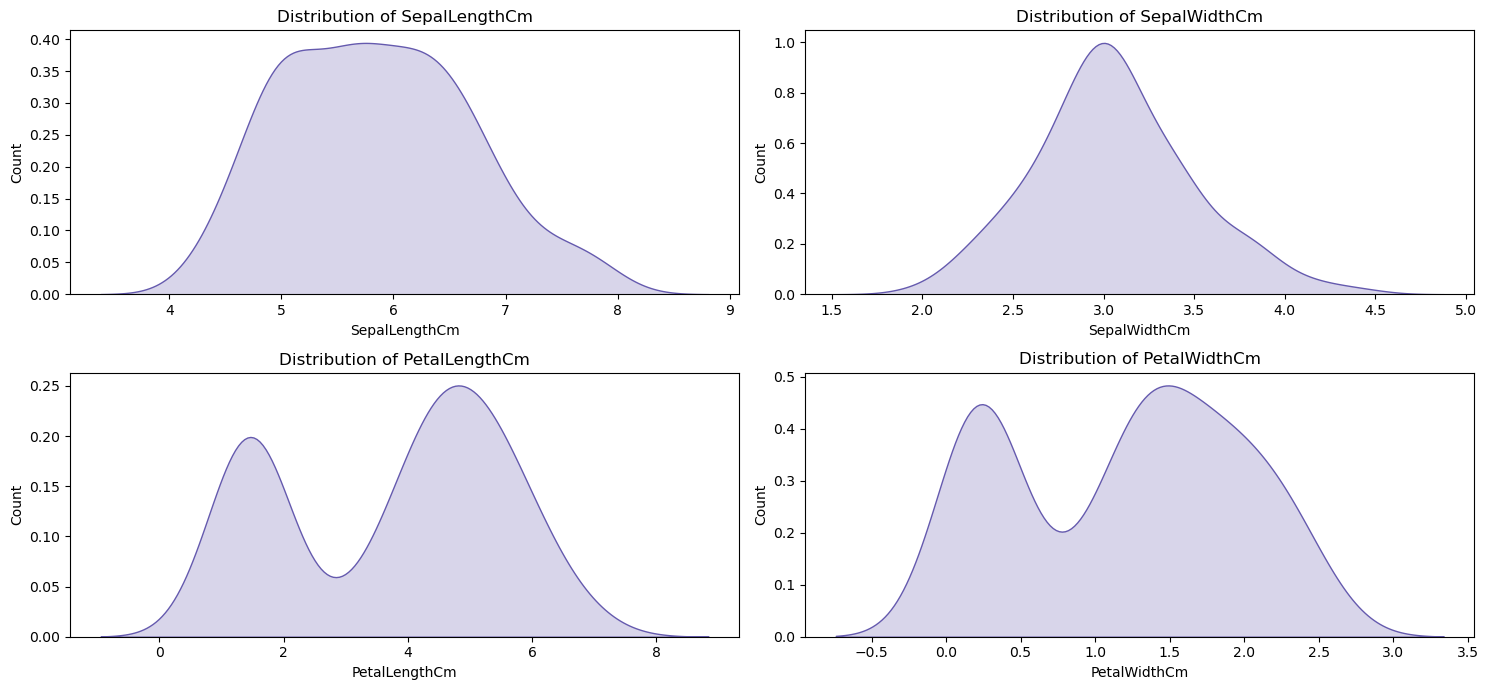

In [10]:
# Select numerical columns
numerical_columns = ['SepalLengthCm', 'SepalWidthCm',
                    'PetalLengthCm' , 'PetalWidthCm']

# Set the figure size for all subplots
plt.figure(figsize = (15 , 7))

# Loop through each numerical column to create a subplot
for index , column in enumerate(numerical_columns):
    plt.subplot(2 , 2 , index + 1)        # Add subplot for each column

    # kdeplot for each column to show the distribution
    sns.kdeplot(data,                  
             x = column,
             fill = True,
             color ="#655AAE")
    
    plt.title(f'Distribution of {column}')  # Add a title for each subplot
    plt.xlabel(column)                      # Label x-axis
    plt.ylabel('Count')                     # Label y-axis
    
plt.tight_layout()  # Adjust spacing between subplots for better readability
plt.show()   

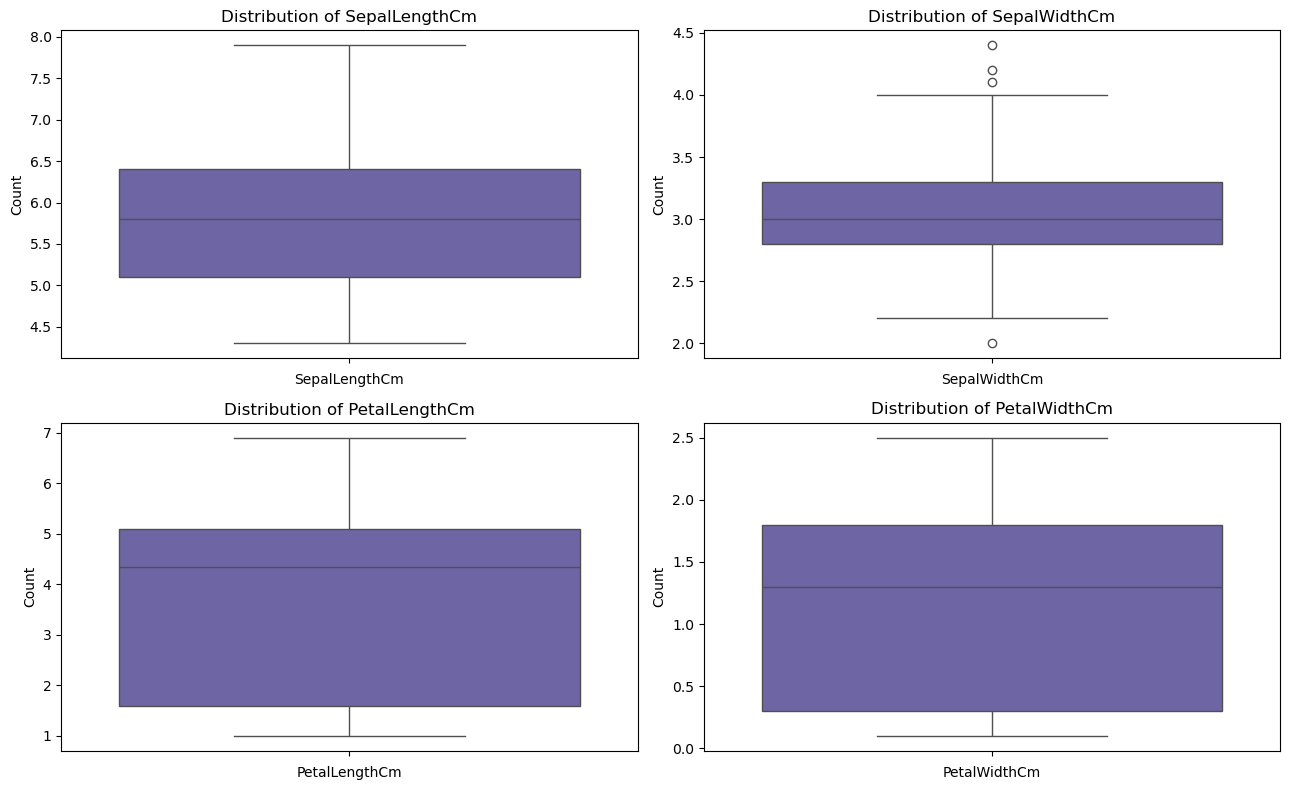

In [11]:
# Select numerical columns
numerical_columns = ['SepalLengthCm', 'SepalWidthCm',
                    'PetalLengthCm' , 'PetalWidthCm']

# Set the figure size for all subplots
plt.figure(figsize = (13 , 8))

# Loop through each numerical column to create a subplot
for index , column in enumerate(numerical_columns):
    plt.subplot(2 , 2 , index + 1)        # Add subplot for each column

    # boxplot for each column to check the outliers
    sns.boxplot(data,                  
             y = column,
             color="#655AAE")
    
    plt.title(f'Distribution of {column}')  # Add a title for each subplot
    plt.xlabel(column)                      # Label x-axis
    plt.ylabel('Count')                     # Label y-axis
    
plt.tight_layout()  # Adjust spacing between subplots for better readability
plt.show()   

In [12]:
# Generate summary statistics for categorical columns
data.describe(include = 'object')

,Species
count,150
unique,3
top,Iris-setosa
freq,50


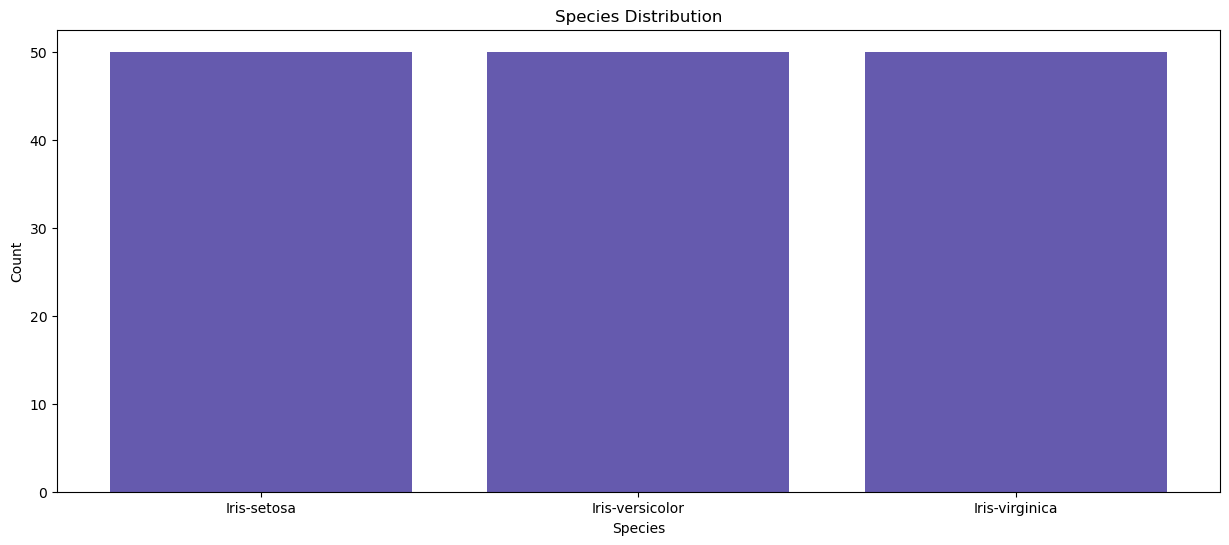

In [13]:
# Set the figure size
plt.figure(figsize = (15, 6))

# Count the number of samples for each species
values = data['Species'].value_counts()

# Bar plot to display distribution of categorical data
plt.bar(x = values.index,
        height = values.values,
        color="#655AAE")

plt.title('Species Distribution') # Add a title to the plot
plt.xlabel('Species')             # Label the x-axis
plt.ylabel('Count')               # Label the y-axis

plt.show()



---
## Initial Exploration & Insights

### Dataset Overview
- **Shape:** 150 rows × 6 columns  
- **Columns:** `Id`, `SepalLengthCm`, `SepalWidthCm`, `PetalLengthCm`, `PetalWidthCm`, `Species`  
- **Missing Values:** None detected 
- **Duplicate Rows:** None found  
- **Memory Usage:** ~7.2 KB 

### Numerical Features
- Explored using summary statistics (`.describe()`), histograms, KDE plots, and boxplots.  
- **Outliers observed:** `SepalWidthCm`  
- Distributions are generally well-behaved, with slight variability in some features.  

### Categorical Feature
- **Species Types:** `Setosa`, `Versicolor`, `Virginica`  
- **Sample Distribution:** Balanced, 50 samples per species 

### Key Takeaways
- Dataset is clean with no missing or duplicate data.  
- Numerical features show distinct patterns; `SepalWidthCm` may need attention due to outliers.  
- Categorical distribution is perfectly balanced, which is ideal for modeling.
---



## 🔍 Feature & Outlier Analysis for Target Insights

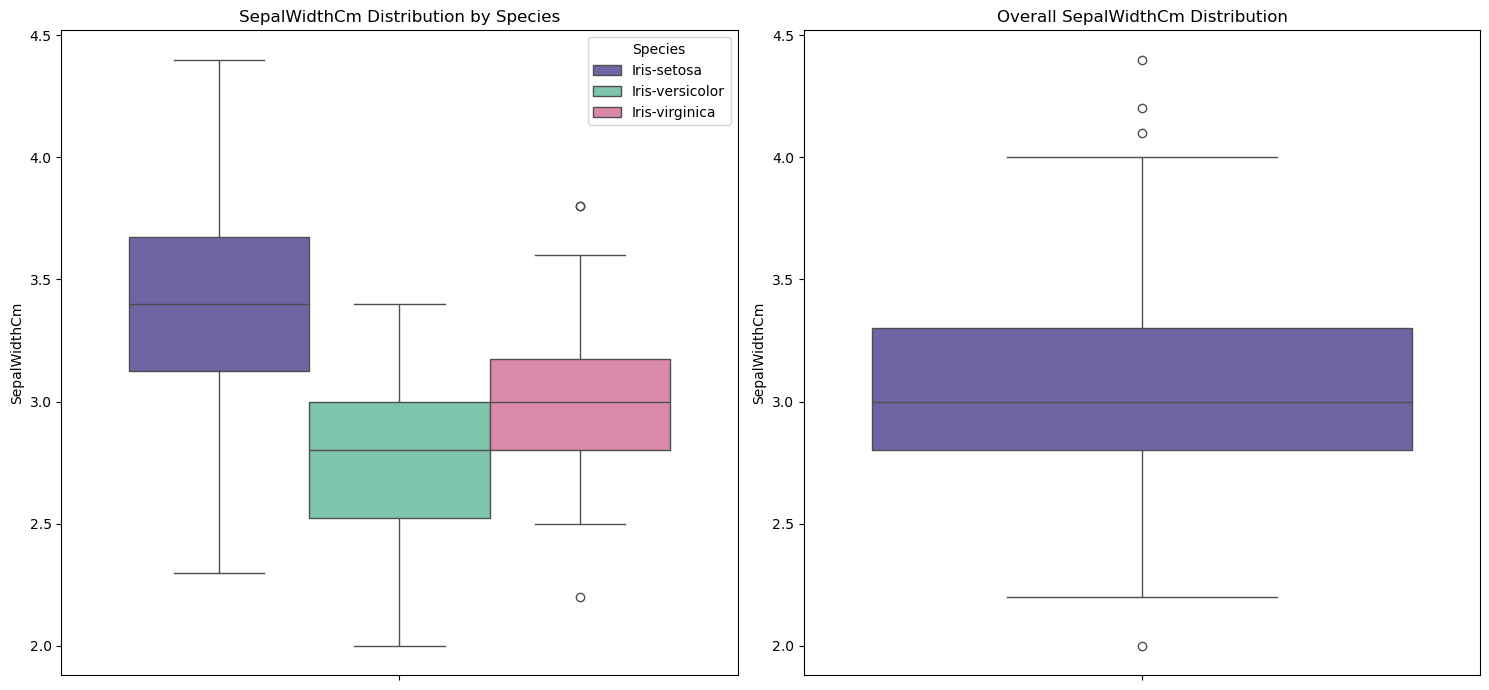

In [14]:
# Set figure size for better visibility
plt.figure(figsize = (15 , 7))

# Box plots of SepalWidthCm
# Left plot: Box per species
plt.subplot(1 , 2 , 1)
sns.boxplot(data,
            y = 'SepalWidthCm',
            hue = 'Species',
            palette={"Iris-setosa": "#655AAE", "Iris-virginica": "#E87CA7", "Iris-versicolor": "#73D1AE"})
plt.title("SepalWidthCm Distribution by Species")

# Right plot: Overall Box
plt.subplot(1 , 2 , 2)
sns.boxplot(data,
            y = 'SepalWidthCm',
            color="#655AAE")
plt.title("Overall SepalWidthCm Distribution")

plt.tight_layout()
plt.show()

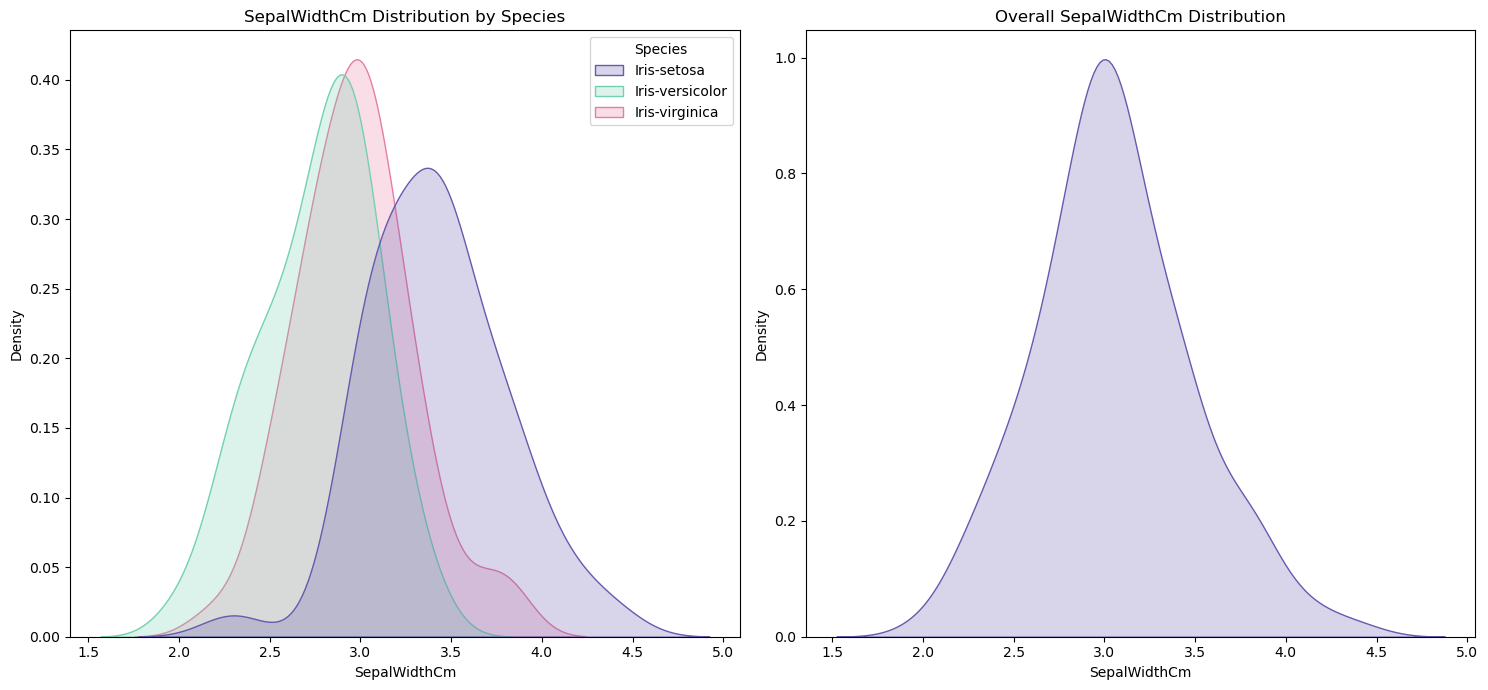

In [15]:
# Set figure size for better visibility
plt.figure(figsize = (15 , 7))

# KDE plots of SepalWidthCm
# Left plot: KDE per species
plt.subplot(1 , 2 , 1)
sns.kdeplot(data,
            x = 'SepalWidthCm',
            hue = 'Species',
            fill = True,
            palette={"Iris-setosa": "#655AAE", "Iris-virginica": "#E87CA7", "Iris-versicolor": "#73D1AE"})
plt.title("SepalWidthCm Distribution by Species")

# Right plot: Overall KDE
plt.subplot(1 , 2 , 2)
sns.kdeplot(data,
            x = 'SepalWidthCm',
            fill = True,
            color="#655AAE")
plt.title("Overall SepalWidthCm Distribution")

plt.tight_layout()
plt.show()

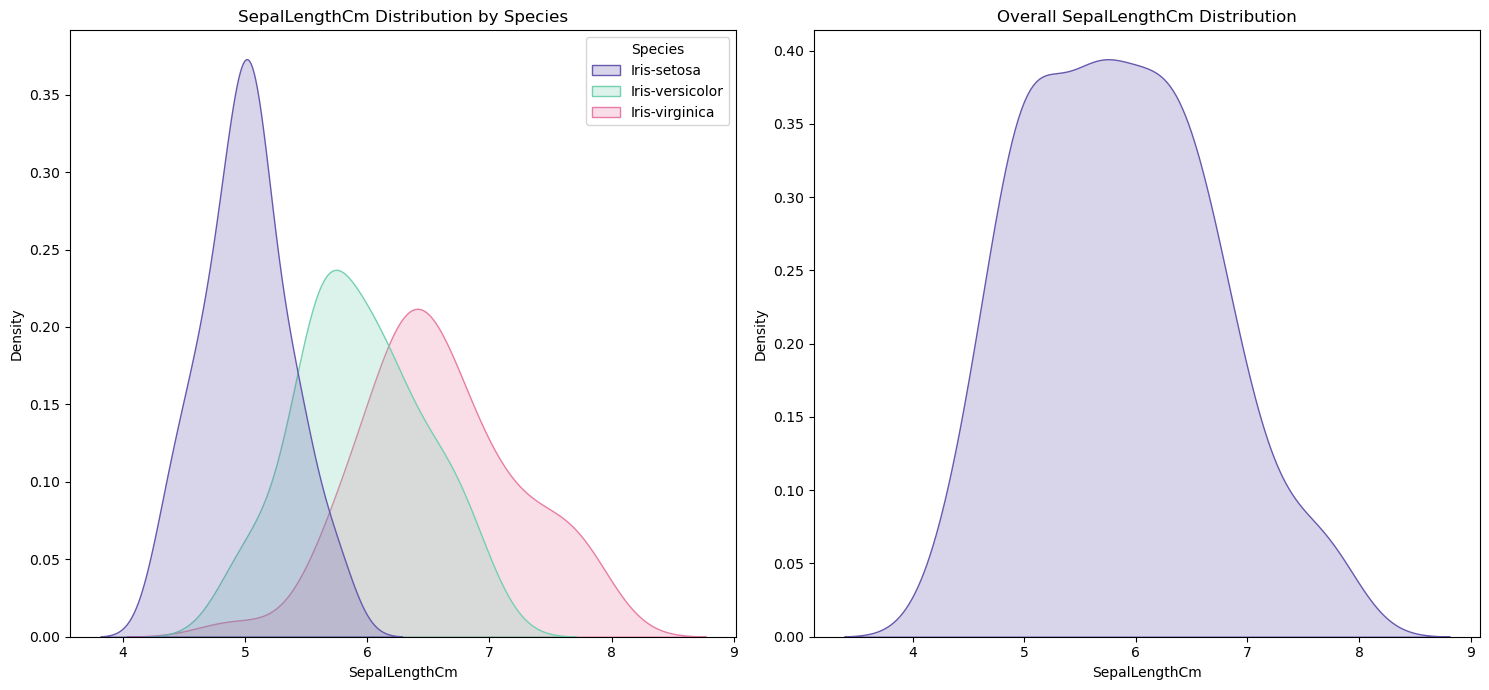

In [16]:
# Set figure size for better visibility
plt.figure(figsize = (15 , 7))

# KDE plots of SepalLengthCm
# Left plot: KDE per species
plt.subplot(1 , 2 , 1)
sns.kdeplot(data,
            x = 'SepalLengthCm',
            hue = 'Species',
            fill = True,
            palette={"Iris-setosa": "#655AAE", "Iris-virginica": "#E87CA7", "Iris-versicolor": "#73D1AE"})
plt.title("SepalLengthCm Distribution by Species")

# Right plot: Overall KDE
plt.subplot(1 , 2 , 2)
sns.kdeplot(data,
            x = 'SepalLengthCm',
            fill = True,
            color="#655AAE")
plt.title("Overall SepalLengthCm Distribution")

plt.tight_layout()
plt.show()

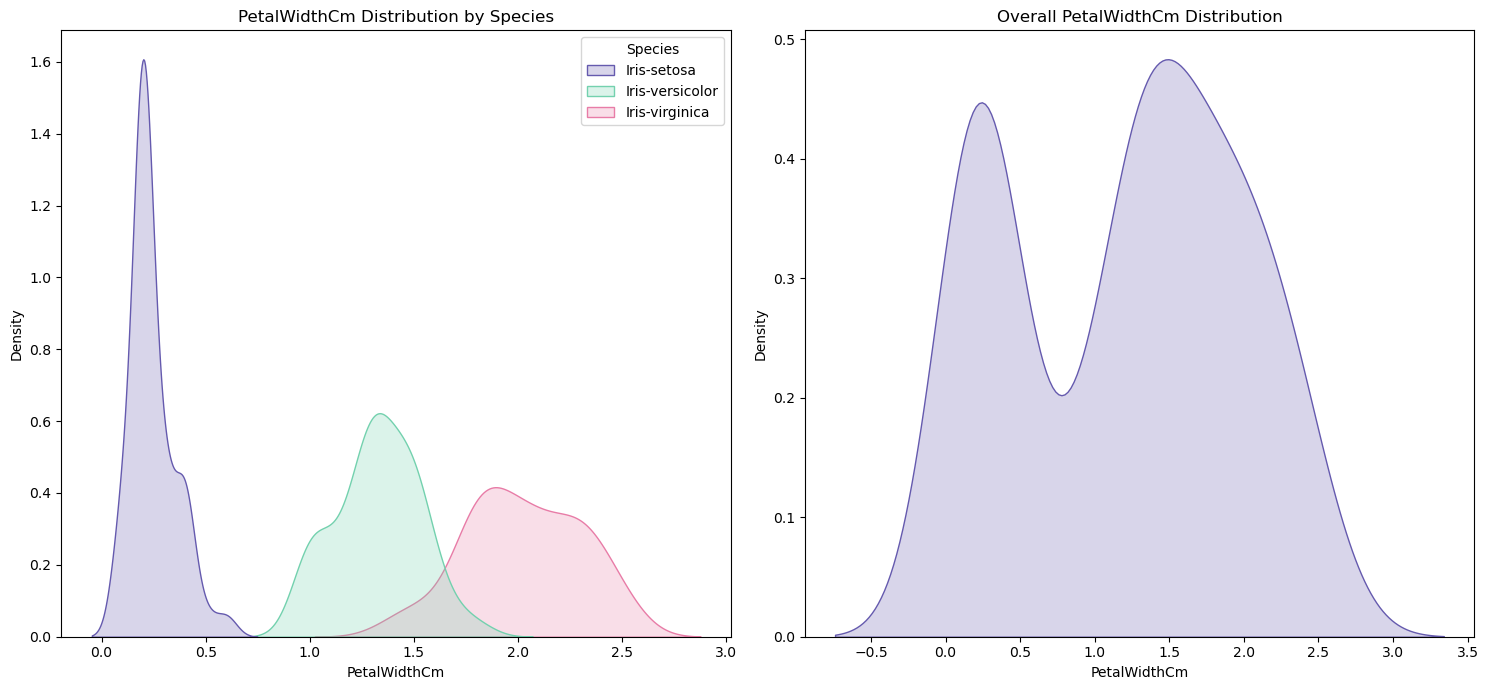

In [17]:
# Set figure size for better visibility
plt.figure(figsize = (15 , 7))

# KDE plots of PetalWidthCm
# Left plot: KDE per species
plt.subplot(1 , 2 , 1)
sns.kdeplot(data,
            x = 'PetalWidthCm',
            hue = 'Species',
            fill = True,
            palette={"Iris-setosa": "#655AAE", "Iris-virginica": "#E87CA7", "Iris-versicolor": "#73D1AE"})
plt.title("PetalWidthCm Distribution by Species")

# Right plot: Overall KDE
plt.subplot(1 , 2 , 2)
sns.kdeplot(data,
            x = 'PetalWidthCm',
            fill = True,
            color="#655AAE")
plt.title("Overall PetalWidthCm Distribution")

plt.tight_layout()
plt.show()

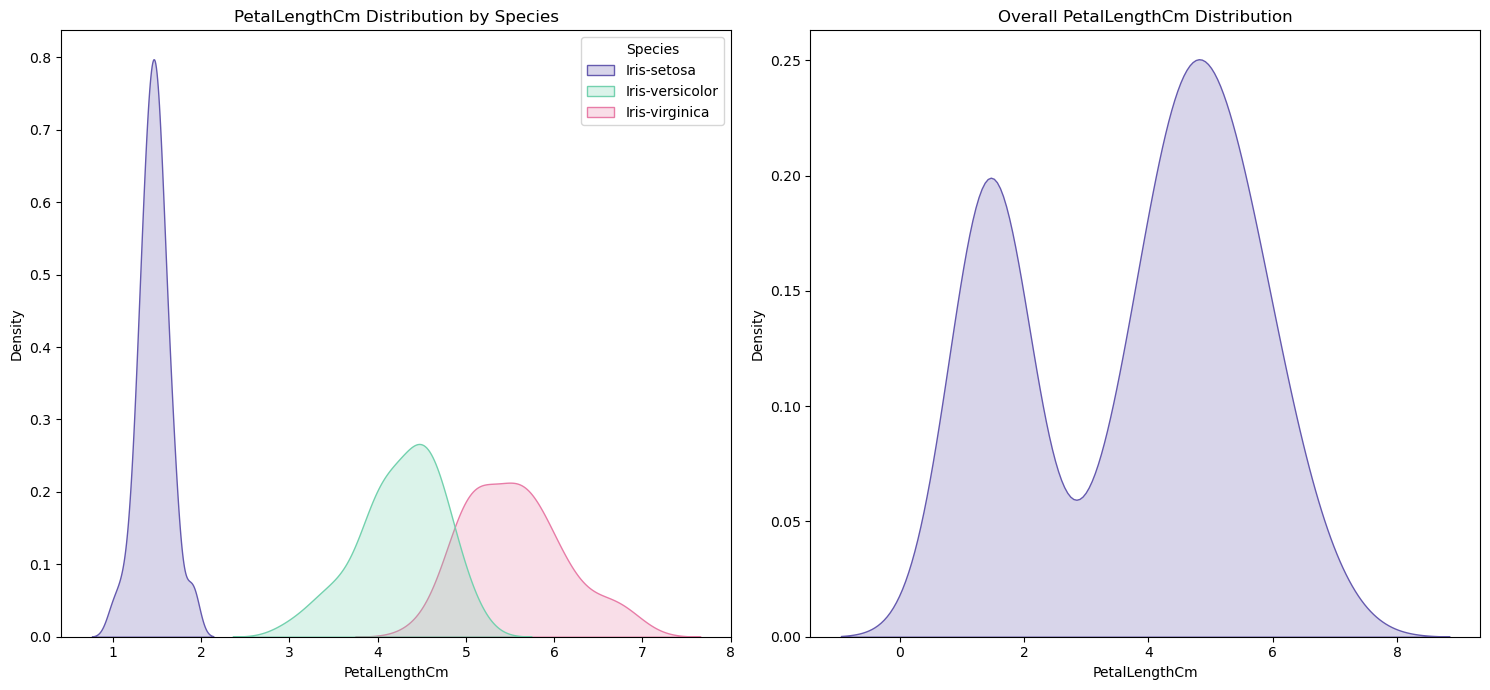

In [18]:
# Set figure size for better visibility
plt.figure(figsize = (15 , 7))

# KDE plots of PetalLengthCm
# Left plot: KDE per species
plt.subplot(1 , 2 , 1)
sns.kdeplot(data,
            x = 'PetalLengthCm',
            hue = 'Species',
            fill = True,
            palette={"Iris-setosa": "#655AAE", "Iris-virginica": "#E87CA7", "Iris-versicolor": "#73D1AE"})
plt.title("PetalLengthCm Distribution by Species")

# Right plot: Overall KDE
plt.subplot(1 , 2 , 2)
sns.kdeplot(data,
            x = 'PetalLengthCm',
            fill = True,
            color="#655AAE")
plt.title("Overall PetalLengthCm Distribution")

plt.tight_layout()
plt.show()

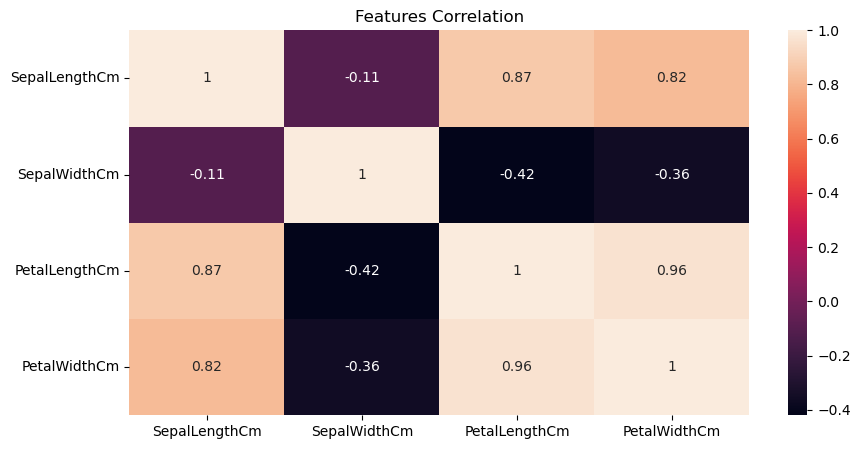

In [19]:
plt.figure(figsize = (10 , 5))
# Compute correlation matrix for numerical features
features = data[['SepalLengthCm' , 'SepalWidthCm' , 'PetalLengthCm' , 'PetalWidthCm']].corr()

# Plot heatmap to visualize correlations
sns.heatmap(features,
            annot = True)

plt.title('Features Correlation')
plt.show()


---
## Feature Analysis & Patterns by Species insights

### Outliers & Distributions
- **SepalWidthCm**: Contains two outlier values in a single species, other species are clean.  
- **Feature Distributions per Species**:  
  - Each feature (`SepalLengthCm`, `SepalWidthCm`, `PetalLengthCm`, `PetalWidthCm`) shows a **distinct pattern for each species**.  
  - Petal measurements (`PetalLengthCm`, `PetalWidthCm`) show **clear separation among the three species**.  
  - Sepal measurements have some overlap but still provide discriminative information.

### Feature Relationships
- **Correlation insights:**  
  - `PetalLengthCm` and `PetalWidthCm` are strongly correlated.  
  - Some Sepal features show moderate correlation, providing additional independent information.  
- **Implication:** All features can be used with minimal concern for redundancy.

### Species Insights
- KDE and Boxplots show that **each species has characteristic ranges for the features**.  
- This gives strong insight for classification, especially for the most distinctive features like petal dimensions.

### Key Takeaways
- Outliers are few and have minimal impact, so no immediate action is needed.  
- Distinct feature distributions per species provide **valuable information for building an accurate classification model**.  
- Dataset is ready for the next phase: **Modeling**.
---


## 🤖 Modeling:

In [23]:
# Initialize LabelEncoder
le = LabelEncoder()

# Encode 'Species' column into numeric labels
# Iris_Setosa -> 0, Iris_Versicolor -> 1, Iris_Virginica -> 2
y = le.fit_transform(data['Species'])


In [ ]:
# Select numerical features for modeling
x = data[['SepalLengthCm' , 'SepalWidthCm' ,  'PetalLengthCm' , 'PetalWidthCm']]

# Split data into training and testing sets
# 30% test size, 70% training, with random_state for reproducibility
x_tain , x_test , y_train , y_test = train_test_split(x , 
                                                      y , 
                                                      test_size = 0.3,
                                                      random_state = 42)

# Scale features for SVM (standardization: mean=0, std=1)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_tain)
x_test_scaled = scaler.fit_transform(x_test)

In [26]:
# Initialize SVM classifier with RBF kernel
svm_model = SVC(kernel = 'rbf',
          C = 1.0,
          random_state = 42,
          gamma = 'scale')

# Train the SVM model on the scaled training data
svm_model.fit(x_train_scaled , y_train)

SVC(random_state=42)

In [28]:
# Make predictions on test set
y_pred = svm_model.predict(x_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9555555555555556

Confusion Matrix:
 [[19  0  0]
 [ 0 11  2]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.85      0.92        13
           2       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



<Axes: >

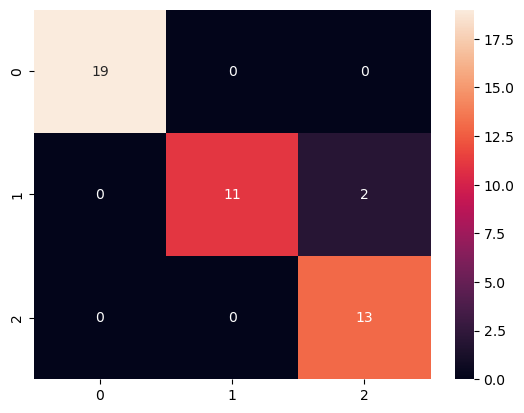

In [ ]:
# Display Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot = True)



---
## 🧠 SVM Classification on Iris Dataset

### Overall Performance
- **Model Used:** Support Vector Machine (SVM) with RBF kernel  
- **Accuracy:** 95.6% ✅ — Excellent overall performance on test set

### Confusion Matrix Analysis
- **Setosa:** Perfectly classified, no errors  
- **Versicolor:** Minor misclassification (2 samples predicted as another class)  
- **Virginica:** Perfectly classified  
- Most misclassifications occur in overlapping regions between Versicolor & Virginica

### Classification Report Highlights
- **Precision:** High for all classes → Most predictions are correct  
- **Recall:** Slightly lower for Versicolor → Some true samples missed  
- **F1-score:** All above 0.9 → Excellent balance between precision and recall  

### Key Takeaways
- SVM with RBF kernel effectively separates Iris species  
- Petal features are highly discriminative; Sepal features provide additional information  
- Minor errors are limited to overlapping feature regions between Versicolor and Virginica  
- The dataset is clean, balanced, and the model is stable and ready for deployment or further experimentation

---
